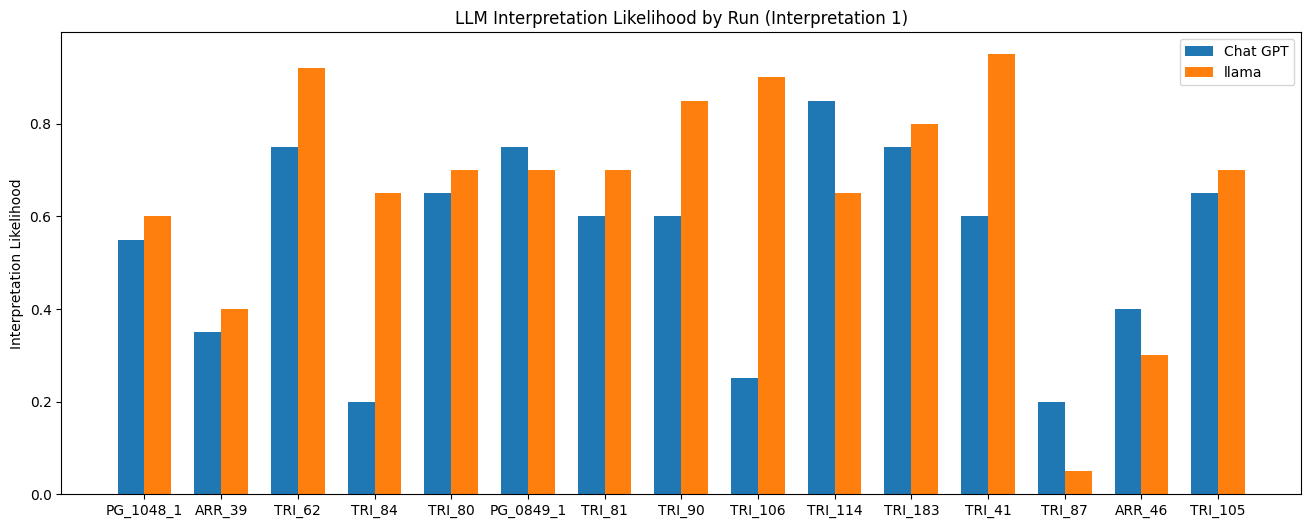

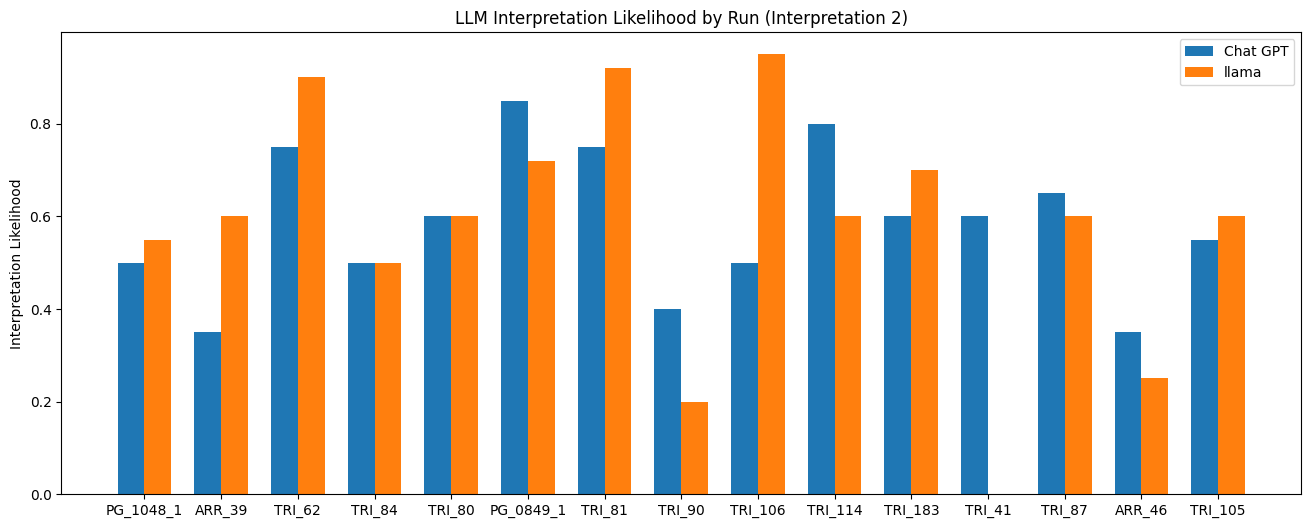

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

def load_json(file_path): # Load JSON Data
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            try:
                return json.load(f)
            except json.JSONDecodeError:
                print("JSON decode error — file is empty or malformed.")
                return {}
    else:
        return {}  # Return empty dict if file doesn't exist


def update_json(data, key, value): # Modify/Add Data
    data[key] = value
    return data

def save_json(file_path, data): # Save JSON Data
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

# === Main Code Graph 1 ===
Run_name_1 = []
ChatGpt_1 = []
llama_1 = []
Interpretation_1 = "I_1"

json_file_path = "../Data/prompt3/interpretations_llm_v1_llama1.json"
json_file = load_json(json_file_path)
for run in json_file:
    if "Synth_Conditions" in json_file[run]:
        if (
            "LLM_interpretation_likelihood" in json_file[run].get(Interpretation_1, {}) and
            "LLM_interpretation_likelihood_llama" in json_file[run].get(Interpretation_1, {})
        ):
            chatgpt_val = json_file[run][Interpretation_1]["LLM_interpretation_likelihood"]
            llama_val = json_file[run][Interpretation_1]["LLM_interpretation_likelihood_llama"]
            if chatgpt_val is not None and llama_val is not None:
                try:
                    ChatGpt_1.append(float(chatgpt_val))
                    llama_1.append(float(llama_val))
                    Run_name_1.append(run)
                except ValueError:
                    print(f"Non-numeric value in run {run}: {chatgpt_val}, {llama_val}")

x1 = np.arange(len(Run_name_1))
width = 0.35

fig1, ax1 = plt.subplots(figsize=(16,6))
rects1 = ax1.bar(x1 - width/2, ChatGpt_1, width, label='Chat GPT')
rects2 = ax1.bar(x1 + width/2, llama_1, width, label='llama')
ax1.set_ylabel('Interpretation Likelihood')
ax1.set_title('LLM Interpretation Likelihood by Run (Interpretation 1)')
ax1.set_xticks(x1)
ax1.set_xticklabels(Run_name_1)
ax1.legend()
plt.show()

# === Main Code Graph 2 ===
Run_name_2 = []
ChatGpt_2 = []
llama_2 = []
Interpretation_2 = "I_2"

for run in json_file:
    if "Synth_Conditions" in json_file[run]:
        if (
            "LLM_interpretation_likelihood" in json_file[run].get(Interpretation_2, {}) and
            "LLM_interpretation_likelihood_llama" in json_file[run].get(Interpretation_2, {})
        ):
            chatgpt_val = json_file[run][Interpretation_2]["LLM_interpretation_likelihood"]
            llama_val = json_file[run][Interpretation_2]["LLM_interpretation_likelihood_llama"]
            if chatgpt_val is not None and llama_val is not None:
                try:
                    ChatGpt_2.append(float(chatgpt_val))
                    llama_2.append(float(llama_val))
                    Run_name_2.append(run)
                except ValueError:
                    print(f"Non-numeric value in run {run}: {chatgpt_val}, {llama_val}")

x2 = np.arange(len(Run_name_2))

fig2, ax2 = plt.subplots(figsize=(16,6))
rects1 = ax2.bar(x2 - width/2, ChatGpt_2, width, label='Chat GPT')
rects2 = ax2.bar(x2 + width/2, llama_2, width, label='llama')
ax2.set_ylabel('Interpretation Likelihood')
ax2.set_title('LLM Interpretation Likelihood by Run (Interpretation 2)')
ax2.set_xticks(x2)
ax2.set_xticklabels(Run_name_2)
ax2.legend()
plt.show()

I_1: ChatGPT: 0.75 - This interpretation includes plausible phases like Mg2V2O7 and MgV2O6, but the presence of two VO2 polymorphs suggests incomplete reaction or kinetic trapping. The composition balance score is high, supporting the likelihood of these phases.
I_1: llama: 0.65 - This interpretation includes plausible phases, but the presence of multiple VO₂ polymorphs and their relative stability at the synthesis temperature need careful consideration.
I_2: ChatGPT: 0.7 - While Mg2V2O7 and MgV2O6 are plausible, the presence of VO2 in space group 58 is less likely, reducing the overall interpretation likelihood. The composition balance score is high, supporting the plausibility of the main phases.
I_2: llama: 0.6 - Similar to I_1, but with a less common VO₂ polymorph, reducing the overall likelihood.
I_3: ChatGPT: 0.6 - The presence of elemental carbon is implausible, significantly reducing the interpretation likelihood. Mg2V2O7 and MgV2O6 are plausible, but the inclusion of carbon de

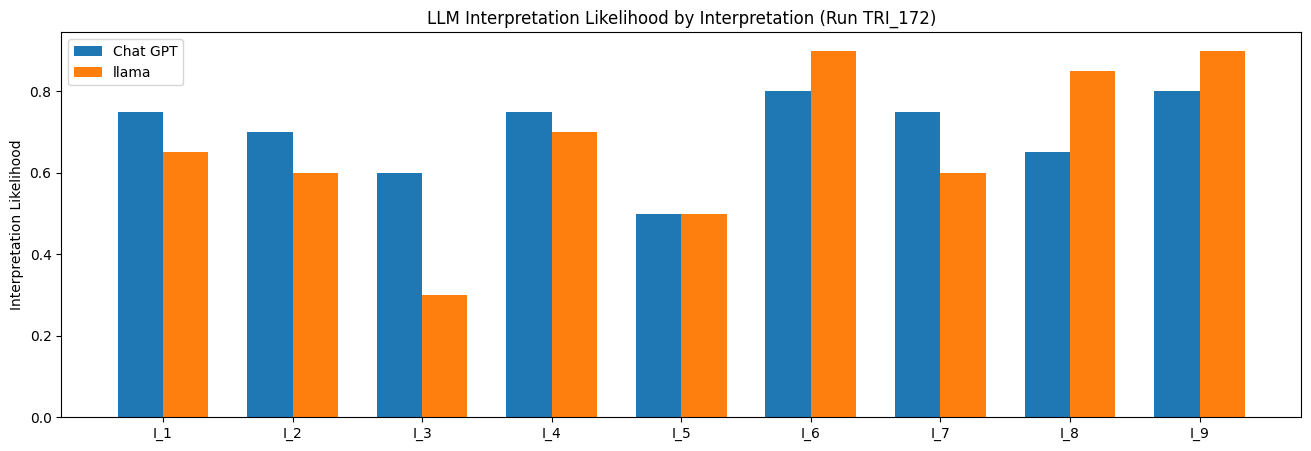

In [48]:
Interpretation = []
ChatGpt_1 = []
llama_1 = []
run = "TRI_172"

json_file_path = "interpretations_llm_v1.json"
json_file = load_json(json_file_path)
for interpret in json_file[run]:
    if interpret not in ["Synth_Conditions"]:
        chatgpt_val = json_file[run][interpret].get("LLM_interpretation_likelihood")
        chatgpt_exp = json_file[run][interpret].get("LLM_interpretation_explanation")
        llama_val = json_file[run][interpret].get("LLM_interpretation_likelihood_llama")
        llama_exp = json_file[run][interpret].get("LLM_interpretation_explanation_llama")
        #print out the scores and explanations for each interpretation
        print(f"{interpret}: ChatGPT: {chatgpt_val} - {chatgpt_exp}")
        print(f"{interpret}: llama: {llama_val} - {llama_exp}") 
        

        if chatgpt_val is not None and llama_val is not None:
            try:
                ChatGpt_1.append(float(chatgpt_val))
                llama_1.append(float(llama_val))
                Interpretation.append(interpret)
            except ValueError:
                print(f"Non-numeric value in run {run}, interpretation {interpret}: {chatgpt_val}, {llama_val}")

x1 = np.arange(len(Interpretation))
width = 0.35

fig1, ax1 = plt.subplots(figsize=(16,5))
rects1 = ax1.bar(x1 - width/2, ChatGpt_1, width, label='Chat GPT')
rects2 = ax1.bar(x1 + width/2, llama_1, width, label='llama')
ax1.set_ylabel('Interpretation Likelihood')
ax1.set_title(f'LLM Interpretation Likelihood by Interpretation (Run {run})')
ax1.set_xticks(x1)
ax1.set_xticklabels(Interpretation)
ax1.legend()
plt.show()

In [8]:
import pandas as pd
from IPython.display import display, HTML
def split_phase_and_spacegroup(phase_str):
    """
    Splits a phase string like 'VO2_14' into phase name and space group.
    Returns (phase_name, space_group) as strings.
    """
    if "_" in phase_str:
        phase_name, space_group = phase_str.rsplit("_", 1)
        return phase_name, space_group
    else:
        return phase_str, None
def interpret_dict_list(run_interpretations): 
    """
    interprets a dictionary and returns a new dictionary 
    with lists of phases for each interpretation
    """
    interpret_dict = {}  # Dictionary to hold interpretations and their phases in correct format
    for interpret in run_interpretations: # iterate over each interpretation in the run
        if interpret.startswith("I_"):  # Check if the key starts with "I_"
            # Extract the interpretation number and phases
            interpret_dict[interpret] = []  # Initialize an empty list for this interpretation
            for i in range(len(run_interpretations[interpret]["phases"])):
                phase_str = run_interpretations[interpret]["phases"][i] # e.g., "ZrTiO4_18"
                phase_name, space_group = split_phase_and_spacegroup(phase_str) #splits string into phase name and space group 
                wf = int(round(run_interpretations[interpret]["weight_fraction"][i])) # get the weight fraction and round so there is no decimal
                written_phase = f"{phase_name} (space group {space_group}, weight fraction {wf}%)"
                interpret_dict[interpret].append(written_phase)
    return interpret_dict

json_file_path = "../Data/prompt3/interpretations_llm_v1_llama1.json"
json_file = load_json(json_file_path)

rows_sig_diff = []
rows_llama_zero = []
rows_little_diff = []
# Collect runs and interpretations where the difference between LLMs is significant or llama likelihood is zero or little difference

for run in json_file: 
    if "Synth_Conditions" in json_file[run]:
        for interpret in json_file[run]:
            if interpret != "Synth_Conditions":
                chatgpt_val = json_file[run][interpret].get("LLM_interpretation_likelihood")
                chatgpt_exp = json_file[run][interpret].get("LLM_interpretation_explanation")
                llama_val = json_file[run][interpret].get("LLM_interpretation_likelihood_llama")
                llama_exp = json_file[run][interpret].get("LLM_interpretation_explanation_llama")
                diff = chatgpt_val - llama_val
                synth_conditions = json_file[run].get("Synth_Conditions")
                sythCon = (
                    f"Target: {synth_conditions.get('Target', '')}<br>"
                    f"Precursors:{synth_conditions.get('Precursor 1', '')},{synth_conditions.get('Precursor 2', '')},{synth_conditions.get('Precursor 3', '')}<br>"
                    f"Furnace:{synth_conditions.get('Furnace', '')}<br>"
                    f"Temperature:{synth_conditions.get('Temperature (C)', '')} C<br>"
                    f"Dwell Duration:{synth_conditions.get('Dwell Duration (h)', '')}"
                )
                phases = interpret_dict_list(json_file[run])
                phases = phases.get(interpret, [])  # Get the list of phases for this interpretation
                phases = ", ".join(phases) # gets rid of brackets 
                epsilon = 1e-8
                if abs(diff) > 0.30 + epsilon: # select out runs+interpretations where the difference between LLMs is greater than eg. 0.30 (could change this threshold)
                    rows_sig_diff.append({
                        "Difference >0.30": f"{run} {interpret}",
                        "Difference (Gpt-llama)": diff,
                        "ChatGPT Likelihood": chatgpt_val,
                        "Llama Likelihood": llama_val,
                        "Synth Conditions": sythCon,
                        "Interpretation Phases": phases,
                        "ChatGPT Explanation": chatgpt_exp,
                        "Llama Explanation": llama_exp,
                    })
                if llama_val == 0.0: # select out runs+interpretaions where llama likelihood is zero 
                    rows_llama_zero.append({
                        "Llama reported likelihood as zero": f"{run} {interpret}",
                        "Difference (Gpt-llama)": diff,
                        "ChatGPT Likelihood": chatgpt_val,
                        "Llama Likelihood": llama_val,
                        "Synth Conditions": sythCon,
                        "Interpretation Phases": phases,
                        "ChatGPT Explanation": chatgpt_exp,
                        "Llama Explanation": llama_exp,
                    })
                if abs(diff) < 0.10:
                    rows_little_diff.append({
                        "Difference was less than 0.10": f"{run} {interpret}",
                        "Difference (Gpt-llama)": diff,
                        "ChatGPT Likelihood": chatgpt_val,
                        "Llama Likelihood": llama_val,
                        "Synth Conditions": sythCon,
                        "Interpretation Phases": phases,
                        "ChatGPT Explanation": chatgpt_exp,
                        "Llama Explanation": llama_exp,
                    })


df_sig_diff = pd.DataFrame(rows_sig_diff) #convert to dataframes
df_sig_diff = df_sig_diff.sort_values(by="Difference (Gpt-llama)", ascending=False)
df_llama_zero = pd.DataFrame(rows_llama_zero)
df_little_diff = pd.DataFrame(rows_little_diff) 
df_little_diff = df_little_diff.sort_values(by="Difference (Gpt-llama)", ascending=False)



# Set display options for line breaks 
pd.set_option('display.max_colwidth', None)
display(HTML("<style>pre {white-space: pre-wrap;}</style>"))

# Display DataFrames in Jupyter Notebook
display(HTML(df_sig_diff.to_html(escape=False)))
display(HTML(df_llama_zero.to_html(escape=False)))
display(HTML(df_little_diff.to_html(escape=False)))

# Save DataFrames to CSV files (Comment out if not needed)
# df_sig_diff.to_csv("Data/sig_diff.csv", index=False)
# df_llama_zero.to_csv("Data/llama_zero.csv", index=False)
# df_little_diff.to_csv("Data/little_diff.csv", index=False)

,Difference >0.30,Difference (Gpt-llama),ChatGPT Likelihood,Llama Likelihood,Synth Conditions,Interpretation Phases,ChatGPT Explanation,Llama Explanation
10,TRI_41 I_2,0.60,0.60,0.00,"Target: LiV3O4Precursors:Li2CO3,V2O5,Furnace:BFTemperature:600.0 CDwell Duration:8.0","Li14V43O114 (space group 11, weight fraction 100%)","Similar to I_1, this interpretation suggests the formation of LiV₃O₈ rather than the target LiV₃O₄. The complex formula does not align with the expected synthesis outcome, indicating a deviation from the intended product. The interpretation lacks completeness and does not account for the expected LiV₃O₄ phase.",This interpretation is highly implausible due to the unknown nature of the phase and poor composition balance.
11,TRI_105 I_7,0.45,0.50,0.05,"Target: CaV2O3Precursors:CaCO3,V2O3,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 167, weight fraction 100%)","While V2O3 is expected, the absence of other phases like CaO reduces the completeness of this interpretation.",This interpretation is highly unlikely for the same reasons as I_6.
4,PG_0849_1 I_4,0.35,0.45,0.10,"Target: CoWO4Precursors:CoO,WO3,Furnace:BFTemperature:900.0 CDwell Duration:0.02","WO3 (space group 14, weight fraction 100%)","This interpretation lacks CoWO4, which is expected to form under the synthesis conditions. The composition balance score is low, indicating a significant deviation from the target composition.",This interpretation is also highly unlikely for similar reasons as I_3.
9,TRI_41 I_1,-0.35,0.60,0.95,"Target: LiV3O4Precursors:Li2CO3,V2O5,Furnace:BFTemperature:600.0 CDwell Duration:8.0","LiV3O8 (space group 11, weight fraction 100%)","While LiV₃O₈ is a plausible phase under the synthesis conditions, it does not match the target composition of LiV₃O₄. The interpretation lacks completeness as it does not account for the expected LiV₃O₄ phase, suggesting a deviation from the intended synthesis outcome.",This interpretation is highly plausible as it corresponds to the expected product LiV₃O₈ with a suitable structure and no indication of impurities or unexpected phases.
7,TRI_106 I_3,-0.40,0.20,0.60,"Target: NaVO2Precursors:Na2CO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 15, weight fraction 59%), CO (space group 194, weight fraction 41%)","The inclusion of CO as a solid phase significantly reduces the credibility of this interpretation. The less stable polymorph of V2O3 further reduces the likelihood. The composition balance score is low, indicating a mismatch with the target composition.",The presence of V₂O₃ in a less common polymorph and CO as a solid make this interpretation less likely.
0,PG_1048_1 I_8,-0.40,0.30,0.70,"Target: VCrO4Precursors:Cr2O3,V2O5,Furnace:BFTemperature:400.0 CDwell Duration:0.02","V2O5 (space group 59, weight fraction 100%)","While V2O5 is plausible, the interpretation lacks other expected phases such as Cr2O3 or mixed oxides, reducing its overall plausibility.",This interpretation is plausible as V2O5 is a precursor and may remain unreacted.
1,PG_1048_1 I_9,-0.40,0.30,0.70,"Target: VCrO4Precursors:Cr2O3,V2O5,Furnace:BFTemperature:400.0 CDwell Duration:0.02","Cr2O3 (space group 167, weight fraction 100%)","While Cr2O3 is plausible, the interpretation lacks other expected phases such as V2O5 or mixed oxides, reducing its overall plausibility.",This interpretation is plausible as Cr2O3 is a precursor and may remain unreacted.
6,TRI_106 I_2,-0.45,0.50,0.95,"Target: NaVO2Precursors:Na2CO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 167, weight fraction 100%)","This interpretation is plausible due to the presence of V2O3, but it lacks completeness as it does not account for other potential phases or unreacted precursors. The composition balance score is low, indicating a mismatch with the target composition.",This interpretation is highly plausible with correct phase identification and no unlikely components.
2,TRI_84

,Llama reported likelihood as zero,Difference (Gpt-llama),ChatGPT Likelihood,Llama Likelihood,Synth Conditions,Interpretation Phases,ChatGPT Explanation,Llama Explanation
0,PG_1048_1 I_7,0.10,0.10,0.0,"Target: VCrO4Precursors:Cr2O3,V2O5,Furnace:BFTemperature:400.0 CDwell Duration:0.02","VCrO3 (space group 167, weight fraction 100%)","The interpretation is implausible due to the presence of only VCrO3, which is not expected to form under the given synthesis conditions.",This interpretation is highly unlikely as it only includes one phase which is not likely to form under these conditions.
1,TRI_183 I_7,0.30,0.30,0.0,"Target: MgVO3Precursors:MgCO3,V2O5,Furnace:BFTemperature:500.0 CDwell Duration:12.0","VO2 (space group 14, weight fraction 100%)","A single-phase interpretation with VO2 is unlikely under the given conditions, especially with the low composition balance score. The absence of other plausible phases further reduces the likelihood.",This interpretation is highly implausible.
2,TRI_183 I_8,0.05,0.05,0.0,"Target: MgVO3Precursors:MgCO3,V2O5,Furnace:BFTemperature:500.0 CDwell Duration:12.0","C (space group 31, weight fraction 100%)","The presence of carbon as a solid phase is implausible, and the absence of other phases makes this interpretation highly unlikely. The composition balance score is zero, indicating a complete mismatch.",This interpretation is highly implausible.
3,TRI_41 I_2,0.60,0.60,0.0,"Target: LiV3O4Precursors:Li2CO3,V2O5,Furnace:BFTemperature:600.0 CDwell Duration:8.0","Li14V43O114 (space group 11, weight fraction 100%)","Similar to I_1, this interpretation suggests the formation of LiV₃O₈ rather than the target LiV₃O₄. The complex formula does not align with the expected synthesis outcome, indicating a deviation from the intended product. The interpretation lacks completeness and does not account for the expected LiV₃O₄ phase.",This interpretation is highly implausible due to the unknown nature of the phase and poor composition balance.


,Difference was less than 0.10,Difference (Gpt-llama),ChatGPT Likelihood,Llama Likelihood,Synth Conditions,Interpretation Phases,ChatGPT Explanation,Llama Explanation
28,TRI_105 I_4,0.10,0.60,0.50,"Target: CaV2O3Precursors:CaCO3,V2O3,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 15, weight fraction 70%), CaO (space group 225, weight fraction 17%), Ca5V3O13 (space group 176, weight fraction 13%)",The presence of a less stable V2O3 polymorph reduces the overall likelihood. The phase set is plausible but not optimal.,The incorrect polymorph for V₂O₃ reduces the likelihood of this interpretation.
23,ARR_46 I_2,0.10,0.35,0.25,"Target: CaTiNiP2O9Precursors:CaO,NH4H2PO4,Furnace:BFTemperature:900.0 CDwell Duration:4.0","CaP2(HO2)4 (space group 2, weight fraction 70%), Ti12O25 (space group 61, weight fraction 16%), CaTi4(PO4)6 (space group 148, weight fraction 14%)","The presence of CaP2H4O8 remains implausible, and Ti12O25 is less stable than rutile TiO2 under these conditions. The composition balance score is better than I_1, but the presence of implausible phases reduces the overall likelihood.","The interpretation includes implausible hydrogen-containing phases and less common titanium oxides, reducing its overall credibility."
22,TRI_87 I_5,0.10,0.75,0.65,"Target: CaVO2Precursors:CaCO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","CaC2 (space group 2, weight fraction 29%), Ca5V3O13 (space group 176, weight fraction 22%), V9O17 (space group 2, weight fraction 19%), CaCO3 (space group 167, weight fraction 16%), V2O5 (space group 15, weight fraction 14%)","This interpretation includes plausible phases such as Ca5V3O13, V9O17, and unreacted V2O5 and CaCO3. The inclusion of CaC2 is unlikely, but the overall phase set is consistent with the synthesis conditions.","This interpretation includes plausible phases like Ca₅V₃O₁₃, V₉O₁₇, and unreacted CaCO₃ and V₂O₅."
20,TRI_87 I_2,0.05,0.65,0.60,"Target: CaVO2Precursors:CaCO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","CaC2 (space group 2, weight fraction 35%), Ca5V3O13 (space group 176, weight fraction 28%), V9O17 (space group 2, weight fraction 21%), CaCO3 (space group 167, weight fraction 10%), CaC2 (space group 12, weight fraction 6%)","This interpretation includes plausible phases such as Ca5V3O13 and V9O17, and the presence of unreacted CaCO3 is reasonable. The inclusion of CaC2 is unlikely, but the overall phase set is more consistent with the synthesis conditions.","This interpretation includes plausible phases like Ca₅V₃O₁₃ and V₉O₁₇, and unreacted CaCO₃. However, the presence of CaC₂ is still highly unlikely."
11,PG_0849_1 I_1,0.05,0.75,0.70,"Target: CoWO4Precursors:CoO,WO3,Furnace:BFTemperature:900.0 CDwell Duration:0.02","WO3 (space group 2, weight fraction 69%), CoWO4 (space group 13, weight fraction 31%)","This interpretation includes the correct CoWO4 phase but uses an unusual WO3 polymorph. The composition balance score is moderate, suggesting some unreacted WO3, which is plausible.",This interpretation includes likely phases but underrepresented CoWO₄ formation. Plausible due to moderate balance score and reasonable phase presence.
18,TRI_183 I_8,0.05,0.05,0.00,"Target: MgVO3Precursors:MgCO3,V2O5,Furnace:BFTemperature:500.0 CDwell Duration:12.0","C (space group 31, weight fraction 100%)","The presence of carbon as a solid phase is implausible, and the absence of other phases makes this interpretation highly unlikely. The composition balance score is zero, indicating a complete mismatch.",This interpretation is highly implausible.
21,TRI_87 I_3,0.05,0.15,0.10,"Target: CaVO2Precursors:CaCO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","CaC2 (space group 2, weight fraction 55%), Ca60C20O143 (space group 62, weight fraction 18%), CaC2 (space group 12, weight fraction 15%), Ca (space group 194, weight fraction 7%), V5O9 (space group 2, weight fraction 5%)","This interpretation includes several unlikely phases, such

0.48148148148148145
0.14814814814814814


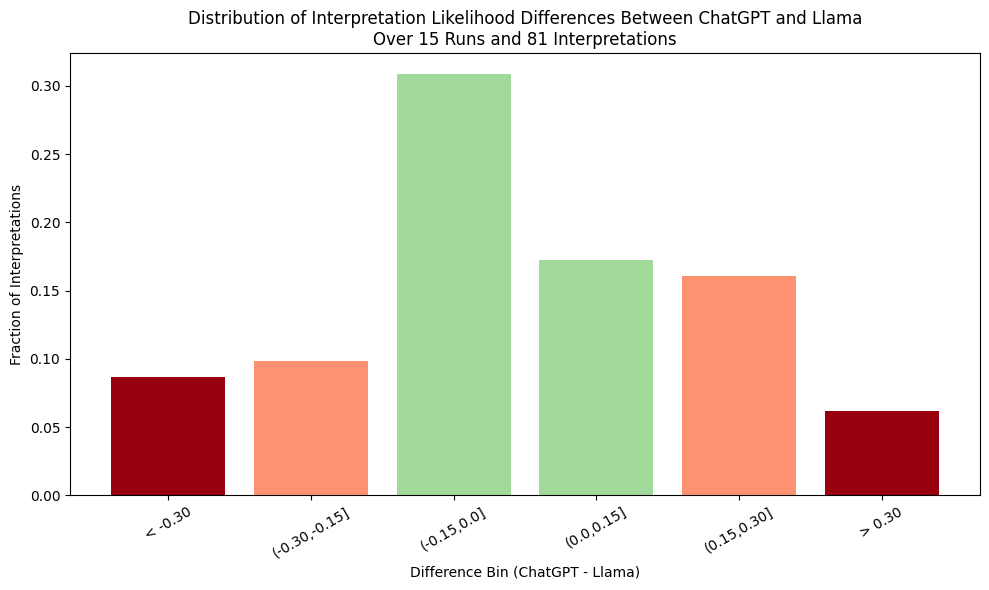

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
over_30 = 0
range15_30 = 0
range0_15 = 0
neg15_0 = 0
neg30_neg15 = 0
over_neg30 = 0
total_interpretations = 0
total_runs = 0
# === Main Code Graph 3 ===
for run in json_file: 
    if "Synth_Conditions" in json_file[run]:
        has_interpretation = any(k.startswith("I_") for k in json_file[run].keys())
        if has_interpretation:
            total_runs += 1
            for interpret in json_file[run]:
                if interpret.startswith("I_"):
                    chatgpt_val = json_file[run][interpret].get("LLM_interpretation_likelihood")
                    llama_val = json_file[run][interpret].get("LLM_interpretation_likelihood_llama")
                    diff = chatgpt_val - llama_val
                    # Count the differences in bins
                    if diff > .30:
                        over_30 += 1
                    elif .15 < diff <= .30:
                        range15_30 += 1
                    elif 0 < diff <= .20:
                        range0_15 += 1
                    elif -.15 < diff <= 0:
                        neg15_0 += 1
                    elif -.30 < diff <= -.20:
                        neg30_neg15 += 1
                    elif -.30 < diff:
                        over_neg30 += 1
                    total_interpretations += 1
# Data for the pie chart
labels = [
    '< -0.30',
    '(-0.30,-0.15]',
    '(-0.15,0.0]',
    '(0.0,0.15]',
    '(0.15,0.30]',
    '> 0.30',
]
sizes = [
    over_neg30/total_interpretations,
    neg30_neg15/total_interpretations,
    neg15_0/total_interpretations,
    range0_15/total_interpretations,
    range15_30/total_interpretations,
    over_30/total_interpretations
]
# Define custom colors for each bin
colors = [
    "#99000d",  # > 0.30 )
    "#fc9272",  # (0.15,0.30] 
    "#a1d99b",  # (0.0,0.15] 
    "#a1d99b",  # (-0.15,0.0] 
    "#fc9272",  # (-0.30,-0.15] 
    "#99000d"   # < -0.30 
]

print(neg15_0/total_interpretations
    +range0_15/total_interpretations)
print(over_neg30/total_interpretations+over_30/total_interpretations)
# Remove zero-size slices for clarity
labels_nonzero = [l for l, s in zip(labels, sizes) if s > 0]
sizes_nonzero = [s for s in sizes if s > 0]
colors_nonzero = [c for c, s in zip(colors, sizes) if s > 0]

# Create Bar Graph 
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels_nonzero, sizes_nonzero, color=colors_nonzero)
ax.set_xlabel('Difference Bin (ChatGPT - Llama)')
ax.set_ylabel('Fraction of Interpretations')
ax.set_title(f'Distribution of Interpretation Likelihood Differences Between ChatGPT and Llama\nOver {total_runs} Runs and {total_interpretations} Interpretations', fontsize=12)
plt.xticks(rotation=30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))  # Set y-ticks every 1 unit
plt.tight_layout()
plt.show()

0.6322580645161291
0.10967741935483871


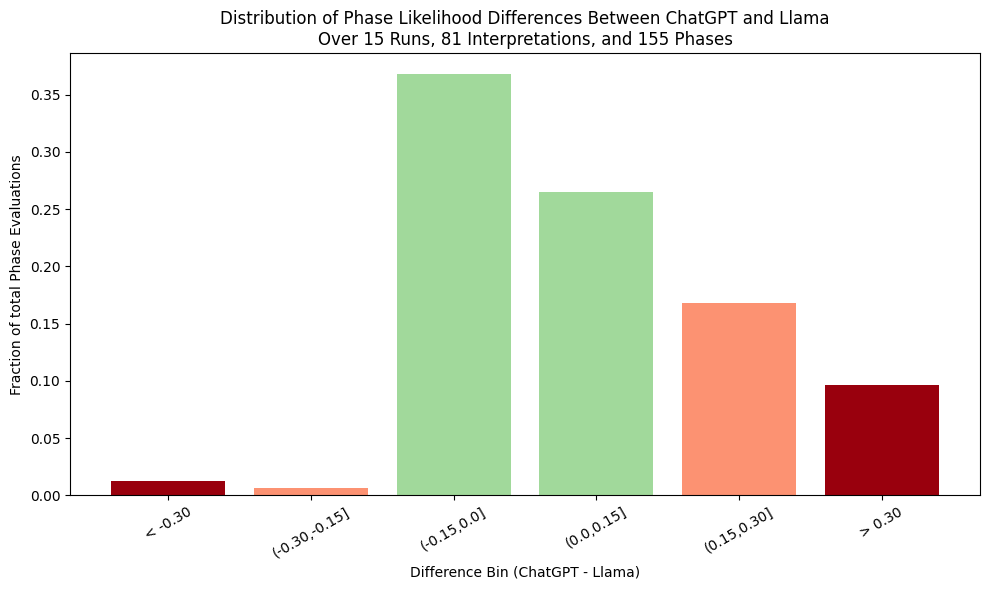

In [10]:
import matplotlib.pyplot as plt
over_30 = 0
range15_30 = 0
range0_15 = 0
neg15_0 = 0
neg30_neg15 = 0
over_neg30 = 0
total_interpretations = 0
total_runs = 0
total_phases = 0
# === Main Code Graph 3 ===
for run in json_file: 
    if "Synth_Conditions" in json_file[run]:
        has_interpretation = any(k.startswith("I_") for k in json_file[run].keys())
        if has_interpretation:
            total_runs += 1
        for interpret in json_file[run]:
            if interpret != "Synth_Conditions":
                total_interpretations += 1
                chatgpt_phases = json_file[run][interpret].get("LLM_phases_likelihood")
                llama_phases = json_file[run][interpret].get("LLM_phases_likelihood_llama")
                for phase in chatgpt_phases:
                    if phase in llama_phases:
                        chatgpt_val = chatgpt_phases[phase]
                        llama_val = llama_phases[phase]
                        diff = chatgpt_val - llama_val
                        # Count the differences in bins
                        if diff > .30:
                            over_30 += 1
                        elif .15 < diff <= .30:
                            range15_30 += 1
                        elif 0 < diff <= .20:
                            range0_15 += 1
                        elif -.15 < diff <= 0:
                            neg15_0 += 1
                        elif -.30 < diff <= -.20:
                            neg30_neg15 += 1
                        elif -.30 < diff:
                            over_neg30 += 1
                        total_phases += 1

# Data for the bar graph
labels = [
    '< -0.30',
    '(-0.30,-0.15]',
    '(-0.15,0.0]',
    '(0.0,0.15]',
    '(0.15,0.30]',
    '> 0.30',
]
sizes = [
    over_neg30/total_phases,
    neg30_neg15/total_phases,
    neg15_0/total_phases,
    range0_15/total_phases,
    range15_30/total_phases,
    over_30/total_phases
]
print(neg15_0/total_phases
    +range0_15/total_phases)
print(over_neg30/total_phases+over_30/total_phases)
# Define custom colors for each bin
colors = [
    "#99000d",  # > 0.30 )
    "#fc9272",  # (0.15,0.30] 
    "#a1d99b",  # (0.0,0.15] 
    "#a1d99b",  # (-0.15,0.0] 
    "#fc9272",  # (-0.30,-0.15] 
    "#99000d"   # < -0.30 
]

# Remove zero-size slices for clarity
labels_nonzero = [l for l, s in zip(labels, sizes) if s > 0]
sizes_nonzero = [s for s in sizes if s > 0]
colors_nonzero = [c for c, s in zip(colors, sizes) if s > 0]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels_nonzero, sizes_nonzero, color=colors_nonzero)
ax.set_xlabel('Difference Bin (ChatGPT - Llama)')
ax.set_ylabel('Fraction of total Phase Evaluations')
ax.set_title(f'Distribution of Phase Likelihood Differences Between ChatGPT and Llama\nOver {total_runs} Runs, {total_interpretations} Interpretations, and {total_phases} Phases', fontsize=12)
plt.xticks(rotation=30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))  # Set y-ticks every 1 unit
plt.tight_layout()
plt.show()

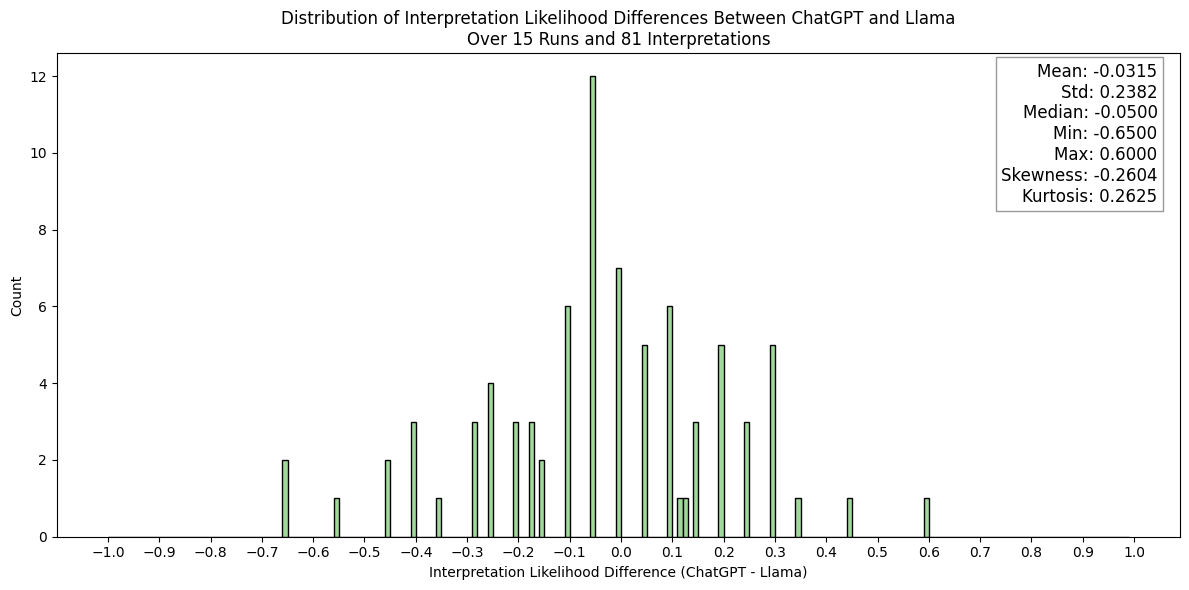

In [11]:
import matplotlib.pyplot as plt
import numpy as n
import scipy
from scipy import stats

# Collect all differences in a list
diffs = []
for run in json_file:
    if "Synth_Conditions" in json_file[run]:
        for interpret in json_file[run]:
            if interpret != "Synth_Conditions":
                chatgpt_val = json_file[run][interpret].get("LLM_interpretation_likelihood")
                llama_val = json_file[run][interpret].get("LLM_interpretation_likelihood_llama")
                if chatgpt_val is not None and llama_val is not None:
                    diffs.append(chatgpt_val - llama_val)

# Define bin edges for every 0.01 from -1 to 1 (adjust range as needed)
bins = np.arange(-1, 1, 0.01)

# Calculate statistics if diffs is not empty
if diffs:  # Check if list is not empty
    diffs_np = np.array(diffs)
    mean = np.mean(diffs_np)
    std = np.std(diffs_np)
    median = np.median(diffs_np)
    min_val = np.min(diffs_np)
    max_val = np.max(diffs_np)
    q25 = np.percentile(diffs_np, 25)
    q75 = np.percentile(diffs_np, 75)
    skew = stats.skew(diffs_np)
    kurtosis = stats.kurtosis(diffs_np)
    stats_text = (
        f"Mean: {mean:.4f}\n"
        f"Std: {std:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Min: {min_val:.4f}\n"
        f"Max: {max_val:.4f}\n"
        f"Skewness: {skew:.4f}\n"
        f"Kurtosis: {kurtosis:.4f}"
    )
else:
    print("No data to compute statistics.")
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(diffs, bins=bins, color="#a1d99b", edgecolor='black')
ax.set_xlabel('Interpretation Likelihood Difference (ChatGPT - Llama)')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Interpretation Likelihood Differences Between ChatGPT and Llama\nOver {total_runs} Runs and {total_interpretations} Interpretations')
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1)) 
ax.text(
    0.98, 0.98, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    va='top', ha='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)
plt.tight_layout()
plt.show()

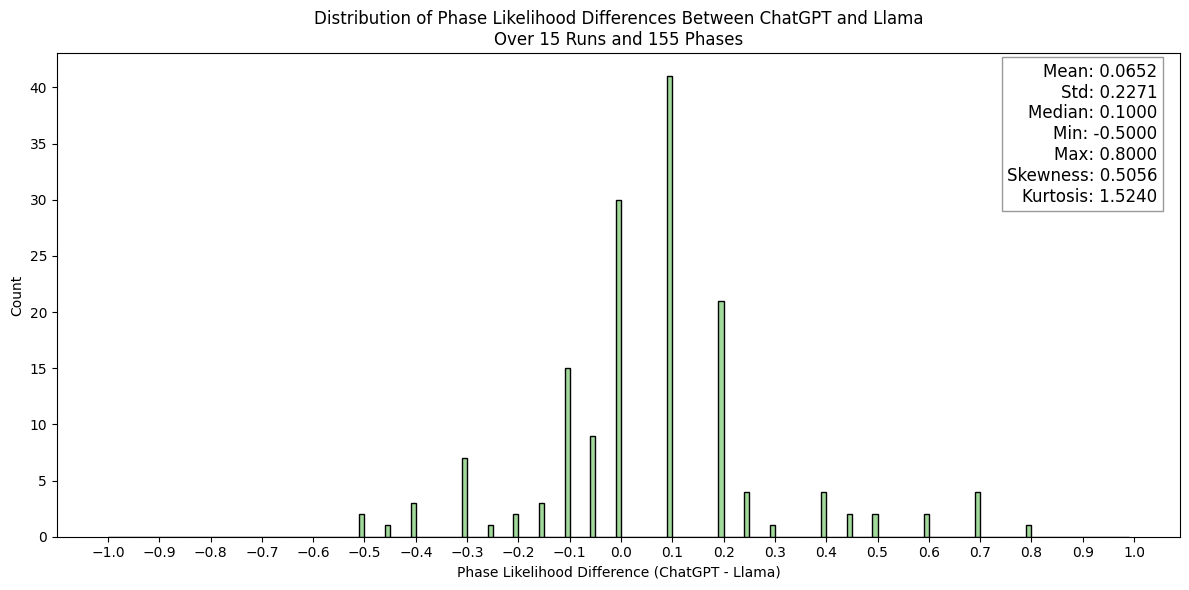

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Collect all phase likelihood differences in a list
phase_diffs = []
for run in json_file:
    if "Synth_Conditions" in json_file[run]:
        for interpret in json_file[run]:
            if interpret != "Synth_Conditions":
                chatgpt_phases = json_file[run][interpret].get("LLM_phases_likelihood")
                llama_phases = json_file[run][interpret].get("LLM_phases_likelihood_llama")
                if chatgpt_phases and llama_phases:
                    for phase in chatgpt_phases:
                        if phase in llama_phases:
                            chatgpt_val = chatgpt_phases[phase]
                            llama_val = llama_phases[phase]
                            if chatgpt_val is not None and llama_val is not None:
                                phase_diffs.append(chatgpt_val - llama_val)
# Calculate statistics if phase_diffs is not empty
if diffs:  # Check if list is not empty
    diffs_np = np.array(phase_diffs)
    mean = np.mean(diffs_np)
    std = np.std(diffs_np)
    median = np.median(diffs_np)
    min_val = np.min(diffs_np)
    max_val = np.max(diffs_np)
    skew = stats.skew(diffs_np)
    kurtosis = stats.kurtosis(diffs_np)

    stats_text = (
        f"Mean: {mean:.4f}\n"
        f"Std: {std:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Min: {min_val:.4f}\n"
        f"Max: {max_val:.4f}\n"
        f"Skewness: {skew:.4f}\n"
        f"Kurtosis: {kurtosis:.4f}"
    )
else:
    print("No data to compute statistics.")

# Define bin edges for every 0.01 from -1 to 1
bins = np.arange(-1, 1, 0.01)

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(phase_diffs, bins=bins, color="#a1d99b", edgecolor='black')
ax.set_xlabel('Phase Likelihood Difference (ChatGPT - Llama)')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Phase Likelihood Differences Between ChatGPT and Llama\nOver {total_runs} Runs and {total_phases} Phases')
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))
# Display statistics on the plot
ax.text(
    0.98, 0.98, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    va='top', ha='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

plt.tight_layout()
plt.show()

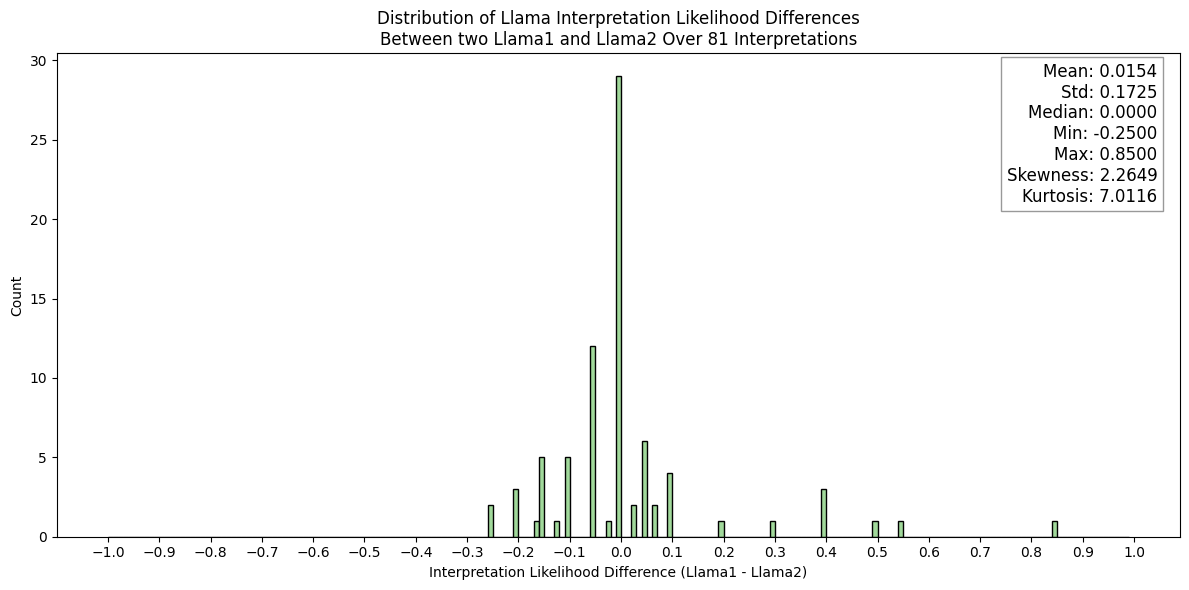

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from scipy import stats

def load_json(file_path):
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            try:
                return json.load(f)
            except json.JSONDecodeError:
                print(f"JSON decode error in {file_path}")
                return {}
    else:
        print(f"File not found: {file_path}")
        return {}

# Load both llama output files
llama1 = load_json("../Data/prompt3/interpretations_llm_v1_llama1.json")
llama2 = load_json("../Data/prompt3/interpretations_llm_v1_llama2.json")

diffs = []
for run in llama1:
    if run in llama2 and "Synth_Conditions" in llama1[run] and "Synth_Conditions" in llama2[run]:
        for interpret in llama1[run]:
            if interpret.startswith("I_") and interpret in llama2[run]:
                val1 = llama1[run][interpret].get("LLM_interpretation_likelihood_llama")
                val2 = llama2[run][interpret].get("LLM_interpretation_likelihood_llama")
                if val1 is not None and val2 is not None:
                    try:
                        diffs.append(float(val1) - float(val2))
                    except Exception:
                        pass

# Define bin edges for every 0.01 from -1 to 1
bins = np.arange(-1, 1, 0.01)

# Calculate statistics if diffs is not empty
if diffs:
    diffs_np = np.array(diffs)
    mean = np.mean(diffs_np)
    std = np.std(diffs_np)
    median = np.median(diffs_np)
    min_val = np.min(diffs_np)
    max_val = np.max(diffs_np)
    skew = stats.skew(diffs_np)
    kurtosis = stats.kurtosis(diffs_np)
    stats_text = (
        f"Mean: {mean:.4f}\n"
        f"Std: {std:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Min: {min_val:.4f}\n"
        f"Max: {max_val:.4f}\n"
        f"Skewness: {skew:.4f}\n"
        f"Kurtosis: {kurtosis:.4f}"
    )
else:
    stats_text = "No data to compute statistics."

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(diffs, bins=bins, color="#a1d99b", edgecolor='black')
ax.set_xlabel('Interpretation Likelihood Difference (Llama1 - Llama2)')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Llama Interpretation Likelihood Differences\nBetween two Llama1 and Llama2 Over {len(diffs)} Interpretations')
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))

# Display statistics on the plot
ax.text(
    0.98, 0.98, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    va='top', ha='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

plt.tight_layout()
plt.show()

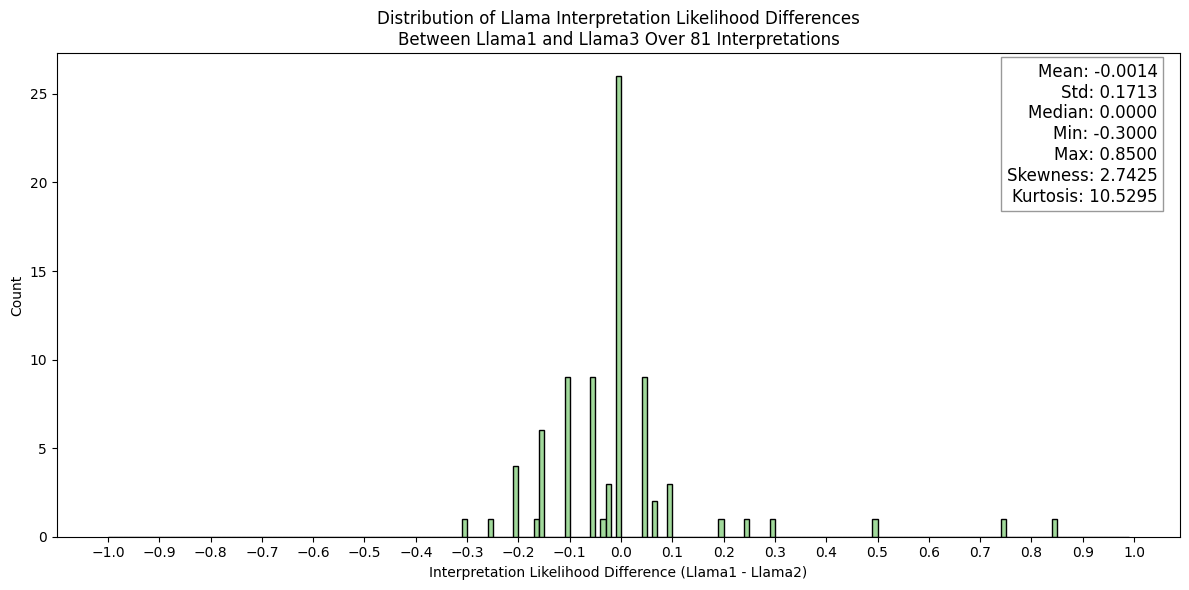

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from scipy import stats

def load_json(file_path):
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            try:
                return json.load(f)
            except json.JSONDecodeError:
                print(f"JSON decode error in {file_path}")
                return {}
    else:
        print(f"File not found: {file_path}")
        return {}

# Load both llama output files
llama1 = load_json("../Data/prompt3/interpretations_llm_v1_llama1.json")
llama3 = load_json("../Data/prompt3/interpretations_llm_v1_llama3.json")

diffs = []
for run in llama1:
    if run in llama3 and "Synth_Conditions" in llama3[run] and "Synth_Conditions" in llama1[run]:
        for interpret in llama1[run]:
            if interpret.startswith("I_") and interpret in llama2[run]:
                val1 = llama1[run][interpret].get("LLM_interpretation_likelihood_llama")
                val2 = llama3[run][interpret].get("LLM_interpretation_likelihood_llama")
                if val1 is not None and val2 is not None:
                    try:
                        diffs.append(float(val1) - float(val2))
                    except Exception:
                        pass

# Define bin edges for every 0.01 from -1 to 1
bins = np.arange(-1, 1, 0.01)

# Calculate statistics if diffs is not empty
if diffs:
    diffs_np = np.array(diffs)
    mean = np.mean(diffs_np)
    std = np.std(diffs_np)
    median = np.median(diffs_np)
    min_val = np.min(diffs_np)
    max_val = np.max(diffs_np)
    skew = stats.skew(diffs_np)
    kurtosis = stats.kurtosis(diffs_np)
    stats_text = (
        f"Mean: {mean:.4f}\n"
        f"Std: {std:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Min: {min_val:.4f}\n"
        f"Max: {max_val:.4f}\n"
        f"Skewness: {skew:.4f}\n"
        f"Kurtosis: {kurtosis:.4f}"
    )
else:
    stats_text = "No data to compute statistics."

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(diffs, bins=bins, color="#a1d99b", edgecolor='black')
ax.set_xlabel('Interpretation Likelihood Difference (Llama1 - Llama2)')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Llama Interpretation Likelihood Differences\nBetween Llama1 and Llama3 Over {len(diffs)} Interpretations')
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))

# Display statistics on the plot
ax.text(
    0.98, 0.98, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    va='top', ha='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Load both llama output files (if not already loaded)
llama1 = load_json("../Data/prompt3/interpretations_llm_v1_llama1.json")
llama2 = load_json("../Data/prompt3/interpretations_llm_v1_llama2.json")

rows_llama_diff = []
for run in llama1:
    if run in llama2 and "Synth_Conditions" in llama1[run] and "Synth_Conditions" in llama2[run]:
        for interpret in llama1[run]:
            if interpret.startswith("I_") and interpret in llama2[run]:
                val1 = llama1[run][interpret].get("LLM_interpretation_likelihood_llama")
                val2 = llama2[run][interpret].get("LLM_interpretation_likelihood_llama")
                exp1 = llama1[run][interpret].get("LLM_interpretation_explanation_llama")
                exp2 = llama2[run][interpret].get("LLM_interpretation_explanation_llama")
                synth_conditions = llama1[run].get("Synth_Conditions")
                sythCon = (
                    f"Target: {synth_conditions.get('Target', '')}"
                    f"Precursors:{synth_conditions.get('Precursor 1', '')},{synth_conditions.get('Precursor 2', '')},{synth_conditions.get('Precursor 3', '')}"
                    f"Furnace:{synth_conditions.get('Furnace', '')}"
                    f"Temperature:{synth_conditions.get('Temperature (C)', '')} C"
                    f"Dwell Duration:{synth_conditions.get('Dwell Duration (h)', '')}"
                )
                phases = interpret_dict_list(llama1[run])
                phases = phases.get(interpret, [])  # Get the list of phases for this interpretation
                phases = ", ".join(phases) # gets rid of brackets 

                if val1 is not None and val2 is not None:
                    try:
                        diff = float(val1) - float(val2)
                        rows_llama_diff.append({
                            "Run": run+interpret,
                            "Difference (Llama1-Llama2)": diff,
                            "Llama1 Likelihood": val1,
                            "Llama2 Likelihood": val2,
                            "Synth Conditions": sythCon,
                            "Interpretation Phases": phases,
                            "Llama1 Explanation": exp1,
                            "Llama2 Explanation": exp2
                        })
                    except Exception:
                        pass

df_llama_diff = pd.DataFrame(rows_llama_diff)
df_llama_diff = df_llama_diff.sort_values(by="Difference (Llama1-Llama2)", ascending=False)
display(df_llama_diff)
# df_llama_diff.to_csv("Data/llama1_llama2_largeDiff.csv", index=False)
# print("Saved llama1_llama2_diff.csv")

,Run,Difference (Llama1-Llama2),Llama1 Likelihood,Llama2 Likelihood,Synth Conditions,Interpretation Phases,Llama1 Explanation,Llama2 Explanation
43,TRI_106I_1,0.85,0.90,0.05,"Target: NaVO2Precursors:Na2CO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 167, weight fraction 59%), CO (space group 194, weight fraction 41%)","The presence of V₂O₃ is plausible, but CO as a solid is highly unlikely. This interpretation requires further consideration of gas-phase species.",The presence of CO as a significant solid product is implausible. V₂O₃ is chemically plausible but the interpretation is heavily penalized by CO.
20,TRI_84I_1,0.55,0.65,0.10,"Target: KVO2Precursors:K2CO3,V2O3,Furnace:TF-ArTemperature:400.0 CDwell Duration:12.0","K2V3O8 (space group 100, weight fraction 100%)","The interpretation seems plausible with a mix of vanadate phases. However, V₂O₅ presence in significant amounts is questionable under Argon atmosphere unless it forms during post-synthesis exposure to air.","The interpretation I_1 includes K₂V₃O₈ as 100% of the product, which does not match the target composition KVO₂ and has a low composition balance score of 0.99. The phase is chemically plausible but does not align with the synthesis target."
45,TRI_106I_3,0.50,0.60,0.10,"Target: NaVO2Precursors:Na2CO3,V2O5,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 15, weight fraction 59%), CO (space group 194, weight fraction 41%)",The presence of V₂O₃ in a less common polymorph and CO as a solid make this interpretation less likely.,The presence of CO and a less common V₂O₃ polymorph reduces the plausibility of this interpretation.
10,ARR_39I_2,0.40,0.60,0.20,"Target: GaSbO4Precursors:Ga2O3,Sb2O5,Furnace:BFTemperature:600.0 CDwell Duration:4.0","Ga2O3 (space group 12, weight fraction 100%)","This interpretation seems more plausible than I_1 as it contains a likely precursor or by-product (Ga2O3). However, the target phase GaSbO4 is still not present.","The interpretation only includes Ga₂O₃, neglecting Sb-containing phases expected from the reaction of Ga₂O₃ and Sb₂O₅. The composition balance score of 0.375 suggests imbalance."
7,PG_1048_1I_8,0.40,0.70,0.30,"Target: VCrO4Precursors:Cr2O3,V2O5,Furnace:BFTemperature:400.0 CDwell Duration:0.02","V2O5 (space group 59, weight fraction 100%)",This interpretation is plausible as V2O5 is a precursor and may remain unreacted.,The interpretation seems unlikely as it suggests no reaction occurred to form VCrO4.
...,...,...,...,...,...,...,...,...
75,TRI_105I_4,-0.20,0.50,0.70,"Target: CaV2O3Precursors:CaCO3,V2O3,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 15, weight fraction 70%), CaO (space group 225, weight fraction 17%), Ca5V3O13 (space group 176, weight fraction 13%)",The incorrect polymorph for V₂O₃ reduces the likelihood of this interpretation.,The use of a less common V₂O₃ polymorph reduces the credibility of this interpretation.
40,TRI_90I_2,-0.20,0.20,0.40,"Target: CaV2O3Precursors:CaCO3,V2O3,Furnace:TF-ArTemperature:700.0 CDwell Duration:12.0","V2O3 (space group 167, weight fraction 100%)",This interpretation is less likely due to the absence of calcium-containing phases and incomplete reaction.,This interpretation lacks other potential phases or unreacted precursors suggested by the synthesis conditions. The composition balance score of 0.593 indicates a possible issue with matching the target composition.
48,TRI_114I_2,-0.20,0.60,0.80,"Target: LiVO2Precursors:Li2CO3,V2O5,Furnace:TF-Ar + H2Temperature:600.0 CDwell Duration:12.0","Li3VO4 (space group 31, weight fraction 48%), V2O3 (space group 167, weight fraction 46%), V2O3 (space group 15, weight fraction 7%)",The presence of multiple V₂O₃ polymorphs makes this interpretation less likely due to redundancy and stability concerns.,This interpretation is more likely due to the dominance of Li₃VO₄ and V₂O₃. The secondary V₂O₃ phase with a different space group is less likely but still po

In [19]:
import pandas as pd

# Load llama1 if not already loaded
llama1 = load_json("../Data/prompt3/interpretations_llm_v1_llama1.json")

rows_short_expl = []
for run in llama1:
    if "Synth_Conditions" in llama1[run]:
        for interpret in llama1[run]:
            if interpret.startswith("I_"):
                explanation = llama1[run][interpret].get("LLM_interpretation_explanation_llama")
                chatgpt_val = llama1[run][interpret].get("LLM_interpretation_likelihood")
                likelihood = llama1[run][interpret].get("LLM_interpretation_likelihood_llama")
                synth_conditions = llama1[run].get("Synth_Conditions")
                sythCon = (
                    f"Target: {synth_conditions.get('Target', '')}"
                    f"Precursors:{synth_conditions.get('Precursor 1', '')},{synth_conditions.get('Precursor 2', '')},{synth_conditions.get('Precursor 3', '')}"
                    f"Furnace:{synth_conditions.get('Furnace', '')}"
                    f"Temperature:{synth_conditions.get('Temperature (C)', '')} C"
                    f"Dwell Duration:{synth_conditions.get('Dwell Duration (h)', '')}"
                )
                phases = interpret_dict_list(llama1[run])
                phases = phases.get(interpret, [])  # Get the list of phases for this interpretation
                phases = ", ".join(phases) # gets rid of brackets 
                chatgpt_exp = llama1[run][interpret].get("LLM_interpretation_explanation")
                if explanation is not None and len(str(explanation)) < 60:
                    rows_short_expl.append({
                        "Run": run+interpret,
                        "Difference": chatgpt_val - likelihood,
                        "Chat GPT Likelihood": chatgpt_val,
                        "Llama Likelihood": likelihood,
                        "Synth Conditions": sythCon,
                        "Interpretation Phases": phases,
                        "Chat GPT Explanation": chatgpt_exp,
                        "Llama Explanation": explanation,
                    })

df_short_expl = pd.DataFrame(rows_short_expl)
# #df_short_expl = df_short_expl.sort_values(by="Run")
# df_short_expl.to_csv("Data/llama1_shortExp.csv", index=False)
display(df_short_expl)


,Run,Difference,Chat GPT Likelihood,Llama Likelihood,Synth Conditions,Interpretation Phases,Chat GPT Explanation,Llama Explanation
0,TRI_62I_4,-0.28,0.60,0.88,"Target: LiV2O3Precursors:Li2CO3,V2O3,Furnace:BFTemperature:500.0 CDwell Duration:8.0","LiV3O8 (space group 11, weight fraction 99%), C (space group 191, weight fraction 1%)","Similar to I_3, the presence of carbon as a solid phase is highly unlikely, reducing the overall interpretation likelihood despite a good composition balance score.",Similar concerns as I_3 regarding elemental carbon.
1,TRI_62I_5,-0.28,0.60,0.88,"Target: LiV2O3Precursors:Li2CO3,V2O3,Furnace:BFTemperature:500.0 CDwell Duration:8.0","LiV3O8 (space group 11, weight fraction 98%), C (space group 194, weight fraction 2%)","Similar to I_3 and I_4, the presence of carbon as a solid phase is highly unlikely, reducing the overall interpretation likelihood despite a good composition balance score.",Similar concerns as I_3 regarding elemental carbon.
2,TRI_62I_9,-0.05,0.85,0.90,"Target: LiV2O3Precursors:Li2CO3,V2O3,Furnace:BFTemperature:500.0 CDwell Duration:8.0","LiV3O8 (space group 11, weight fraction 100%)","This interpretation is highly plausible with LiV3O8 as the sole phase, consistent with the synthesis conditions and a good composition balance score. The absence of other phases is acceptable given the dominance of LiV3O8.",A straightforward and chemically consistent interpretation.
3,TRI_183I_7,0.30,0.30,0.00,"Target: MgVO3Precursors:MgCO3,V2O5,Furnace:BFTemperature:500.0 CDwell Duration:12.0","VO2 (space group 14, weight fraction 100%)","A single-phase interpretation with VO2 is unlikely under the given conditions, especially with the low composition balance score. The absence of other plausible phases further reduces the likelihood.",This interpretation is highly implausible.
4,TRI_183I_8,0.05,0.05,0.00,"Target: MgVO3Precursors:MgCO3,V2O5,Furnace:BFTemperature:500.0 CDwell Duration:12.0","C (space group 31, weight fraction 100%)","The presence of carbon as a solid phase is implausible, and the absence of other phases makes this interpretation highly unlikely. The composition balance score is zero, indicating a complete mismatch.",This interpretation is highly implausible.


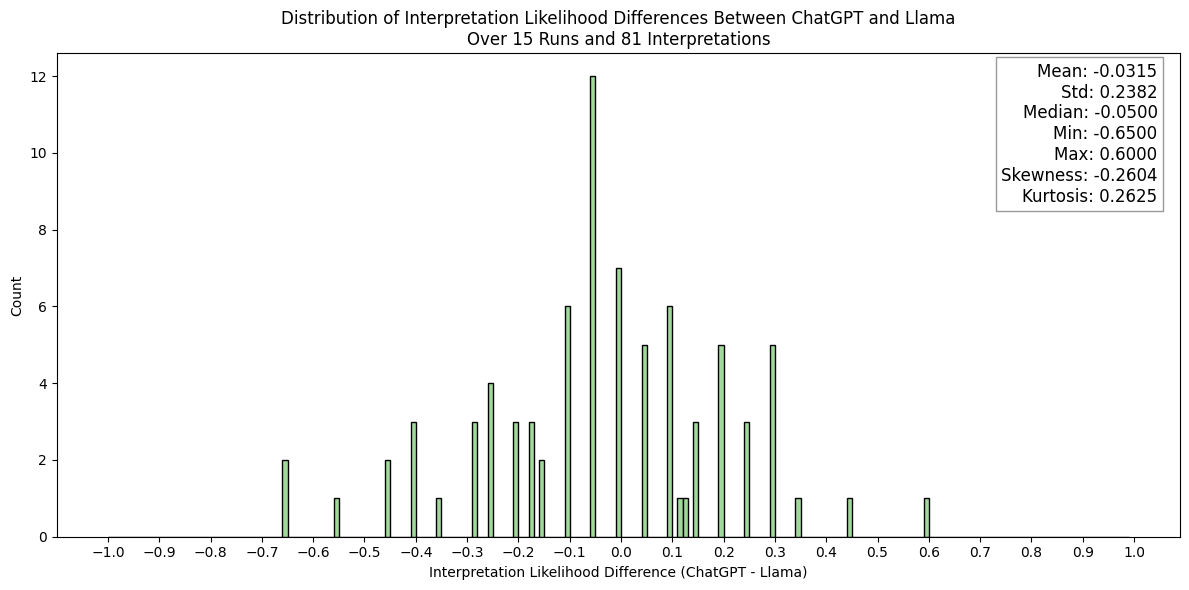

In [20]:
import matplotlib.pyplot as plt
import numpy as n
import scipy
from scipy import stats

# === Graph of Differences Between ChatGPT and Llama1 ===
# === Only look at  runs with less than 10 interpretations ===
total_runs = 0
total_interpretations = 0
json_file = load_json("../Data/prompt3/interpretations_llm_v1_llama1.json")
diffs = [] # Collect all differences in a list
for run in json_file:
    if "Synth_Conditions" in json_file[run]:
        if len(json_file[run])-1 < 10: # Check if there are less than 10 interpretations
            total_runs += 1
            for interpret in json_file[run]:
                if interpret != "Synth_Conditions":
                    total_interpretations += 1
                    chatgpt_val = json_file[run][interpret].get("LLM_interpretation_likelihood")
                    llama_val = json_file[run][interpret].get("LLM_interpretation_likelihood_llama")
                    if chatgpt_val is not None and llama_val is not None:
                        diffs.append(chatgpt_val - llama_val)

# Define bin edges for every 0.01 from -1 to 1 (adjust range as needed)
bins = np.arange(-1, 1, 0.01)

# Calculate statistics if diffs is not empty
if diffs:  # Check if list is not empty
    diffs_np = np.array(diffs)
    mean = np.mean(diffs_np)
    std = np.std(diffs_np)
    median = np.median(diffs_np)
    min_val = np.min(diffs_np)
    max_val = np.max(diffs_np)
    q25 = np.percentile(diffs_np, 25)
    q75 = np.percentile(diffs_np, 75)
    skew = stats.skew(diffs_np)
    kurtosis = stats.kurtosis(diffs_np)
    stats_text = (
        f"Mean: {mean:.4f}\n"
        f"Std: {std:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Min: {min_val:.4f}\n"
        f"Max: {max_val:.4f}\n"
        f"Skewness: {skew:.4f}\n"
        f"Kurtosis: {kurtosis:.4f}"
    )
else:
    print("No data to compute statistics.")
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(diffs, bins=bins, color="#a1d99b", edgecolor='black')
ax.set_xlabel('Interpretation Likelihood Difference (ChatGPT - Llama)')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Interpretation Likelihood Differences Between ChatGPT and Llama\nOver {total_runs} Runs and {total_interpretations} Interpretations')
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1)) 
ax.text(
    0.98, 0.98, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    va='top', ha='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)
plt.tight_layout()
plt.show()